In [1]:
# leave this line at the top http://stackoverflow.com/questions/23550056/figurecanvasagg-object-has-no-attribute-invalidate-python-plotting
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.available

['seaborn-talk',
 'seaborn-muted',
 'seaborn-whitegrid',
 'seaborn-pastel',
 'seaborn-colorblind',
 'seaborn-poster',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'grayscale',
 'seaborn-notebook',
 'seaborn-white',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'seaborn-deep',
 'classic',
 'seaborn-bright',
 'bmh',
 'dark_background',
 'ggplot',
 'seaborn-dark',
 'seaborn-paper']

In [3]:
plt.style.use('seaborn-notebook')

# Intro
Adapted from the fantastic blog post
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/
# Create dataset
Start with 4 time series and "unpivot" the table to get a dataframe with
- a datetime column
- a categorical column
- a numerical column

In [4]:
data = np.random.randn(4, 365).cumsum(axis=1)
dt = pd.date_range('2015-01-01', '2015-12-31')
timeseries_df = pd.DataFrame(data=dict(A=data[0], B=data[1], C=data[2], D=data[3]), index=dt)
timeseries_df.head()

,A,B,C,D
2015-01-01,1.527568,-0.106496,0.574104,0.418827
2015-01-02,1.520233,1.095006,1.042610,-0.334131
2015-01-03,2.539301,-0.646248,0.220829,-0.068432
2015-01-04,1.190996,-1.217485,0.177755,-0.631260
2015-01-05,2.102300,-1.744811,-0.730517,-0.901642


In [5]:
def alternative_dataset():
    import pandas.util.testing as tm; 
    tm.N = 100
    return tm.makeTimeDataFrame()

In [6]:
def unpivot(frame):
    data = {'value' : frame.values.ravel('F'),
            'kind' : np.asarray(frame.columns).repeat(frame.shape[0]),
            'dt' : np.tile(np.asarray(frame.index), frame.shape[1])}
    return pd.DataFrame(data, columns=['dt', 'kind', 'value'])
df = unpivot(timeseries_df)
df.head()


,dt,kind,value
0,2015-01-01,A,1.527568
1,2015-01-02,A,1.520233
2,2015-01-03,A,2.539301
3,2015-01-04,A,1.190996
4,2015-01-05,A,2.102300


In [7]:
df.tail()

,dt,kind,value
1455,2015-12-27,D,2.422439
1456,2015-12-28,D,2.912377
1457,2015-12-29,D,0.431994
1458,2015-12-30,D,2.645237
1459,2015-12-31,D,0.348467


# Lines plots with matplotlib
## Using a loop

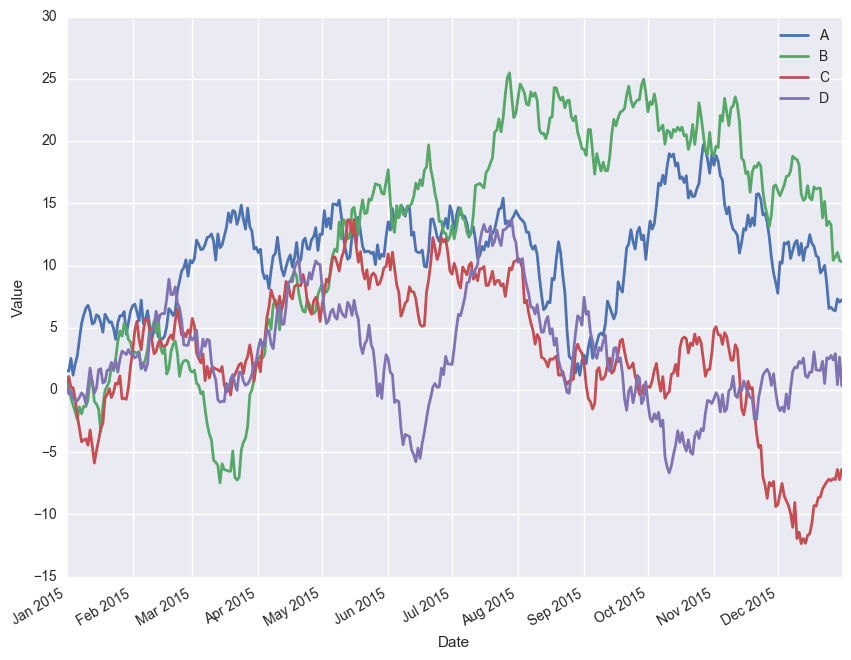

In [8]:
fig = plt.figure(1, figsize=(10,8))
kinds = df.kind.unique()
for k in kinds:
    data = df[df.kind == k]
    plt.plot(data.dt, data.value, lw=2)
fig.autofmt_xdate()
plt.ylabel('Value')
plt.xlabel('Date');
plt.legend(kinds)

## Using a pivot
We can pivot the data to get a dataframe where each column is a series to be ploted. These can be plotted directly by Matplotlib. 

In [9]:
dfp = df.pivot(index='dt', columns='kind', values='value')
dfp.head()

kind,A,B,C,D
dt,,,,
2015-01-01,1.527568,-0.106496,0.574104,0.418827
2015-01-02,1.520233,1.095006,1.042610,-0.334131
2015-01-03,2.539301,-0.646248,0.220829,-0.068432
2015-01-04,1.190996,-1.217485,0.177755,-0.631260
2015-01-05,2.102300,-1.744811,-0.730517,-0.901642


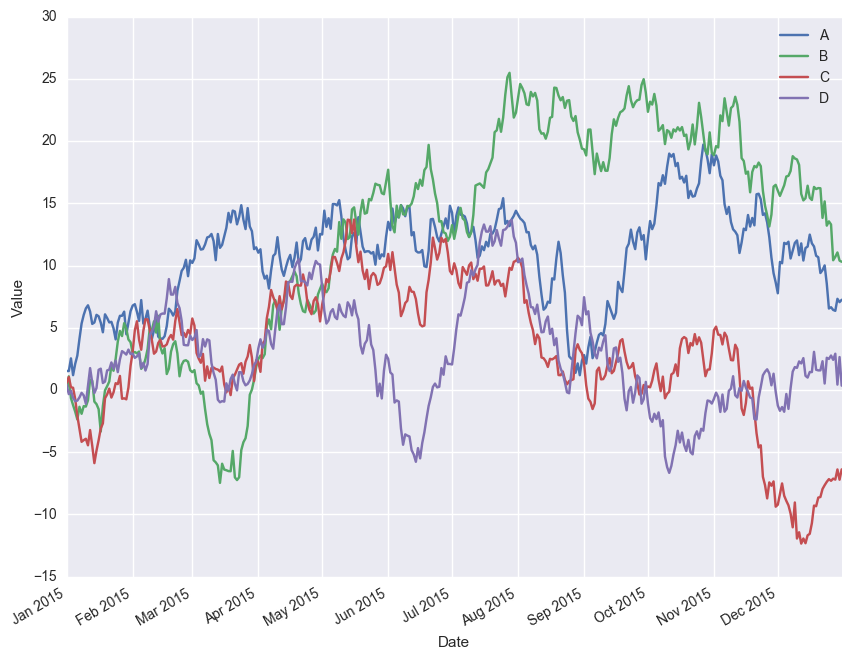

In [10]:
fig = plt.figure(2, figsize=(10, 8))
plt.plot(dfp);
plt.legend(dfp.columns)
fig.autofmt_xdate()
plt.ylabel('Value')
plt.xlabel('Date');

# Line plots with Pandas

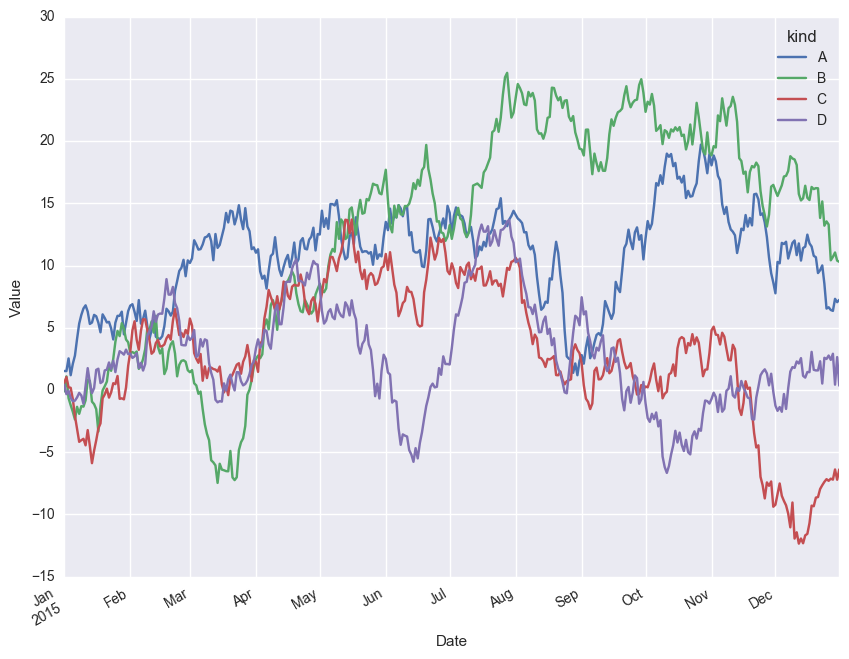

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
dfp.plot(ax=ax)
fig.autofmt_xdate()
plt.ylabel('Value')
plt.xlabel('Date');

## Line plots with Seaborn with FacetGrid

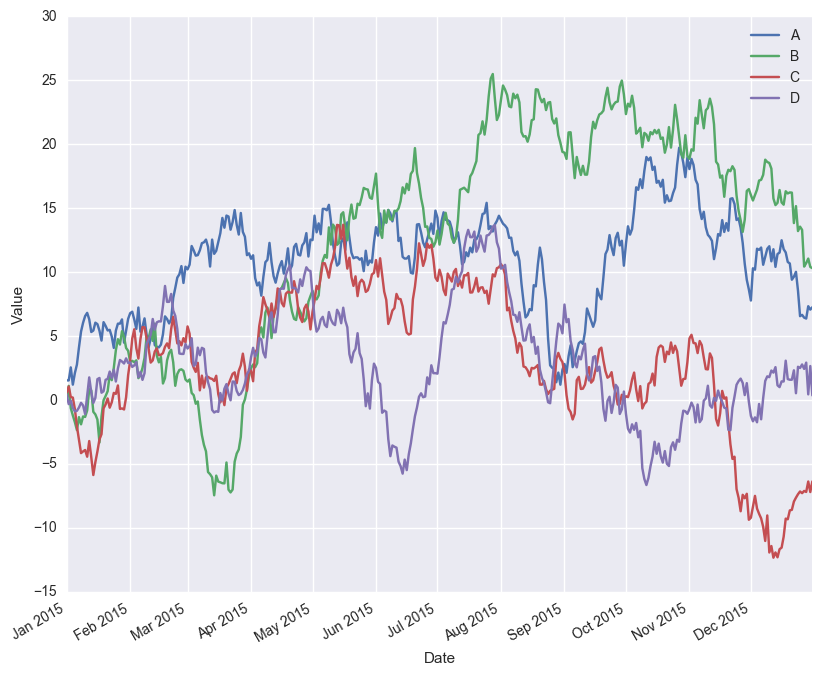

In [12]:
g = sns.FacetGrid(df, hue='kind', aspect=10/8)
g.map(plt.plot, 'dt', 'value')
plt.legend();
plt.ylabel('Value')
plt.xlabel('Date');
g.fig.autofmt_xdate()
g.fig.set_figwidth(10)
g.fig.set_figheight(8)


# Line plots with ggplot

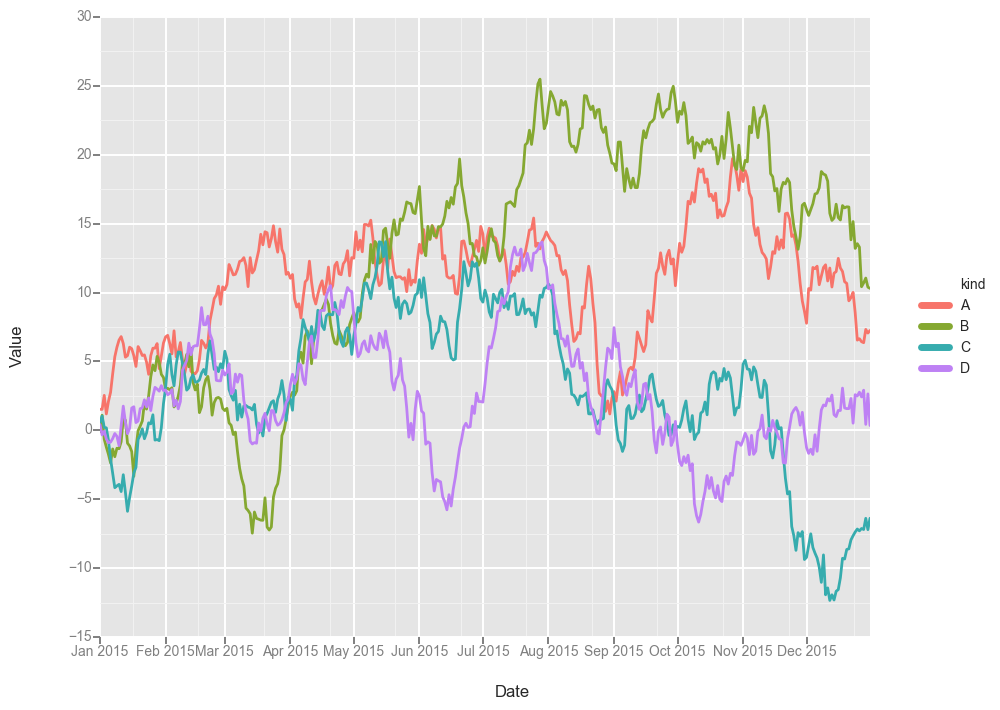

<ggplot: (297273485)>

In [13]:
from ggplot import *
# GGPLOT
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
 
g = ggplot(df, aes(x='dt', y='value', color='kind')) + \
    geom_line(size=2.0) + \
    xlab('Date') + \
    ylab('Value')
g

# Line plots with Altair
Generates JSON for the Vega(-lite) library, built on top of D3. Potentially ground breaking and the API is very neat. 

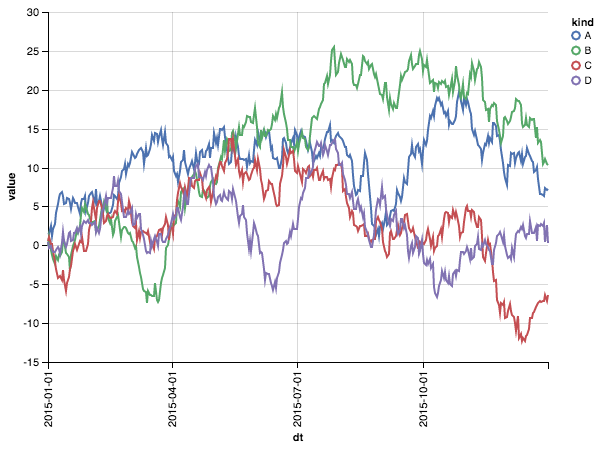

In [14]:
from altair import Chart, Scale, Color
cp = sns.palettes.color_palette()

Chart(df).mark_line().encode(
    x='dt',
    y='value',
    color=Color('kind', scale=Scale(range=cp.as_hex()))
)

# Scene 2
More complex plots using the Iris dataset https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv

In [15]:
iris = pd.read_csv('https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv')

In [16]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris['Name'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Scatter plot with Matplotlib

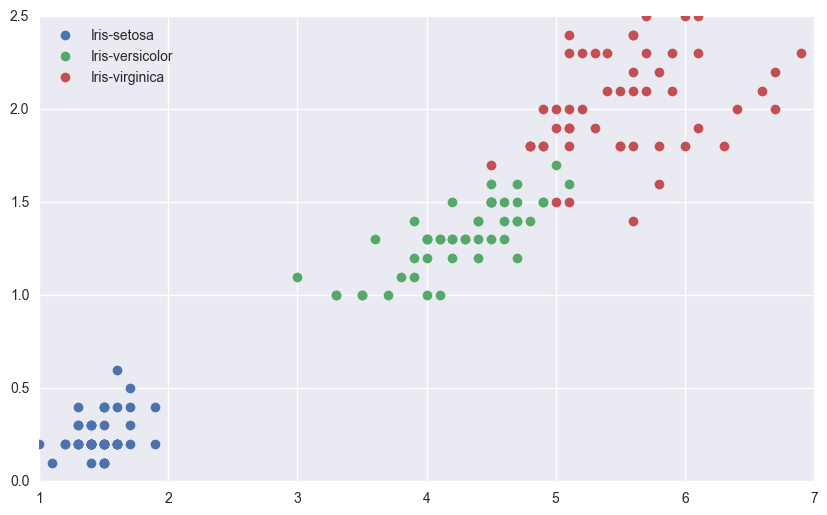

In [18]:
plt.figure(figsize=(10,6))
for name in iris.Name.unique():
    this = iris[iris.Name == name]
    plt.plot(this.PetalLength, this.PetalWidth, 'o', label=name)
plt.legend(loc=0)

We can also combine Matplotlib with Pandas's groupby method.

group = 'Iris-setosa', (50, 5)
group = 'Iris-setosa', (50, 5)
group = 'Iris-versicolor', (50, 5)
group = 'Iris-virginica', (50, 5)


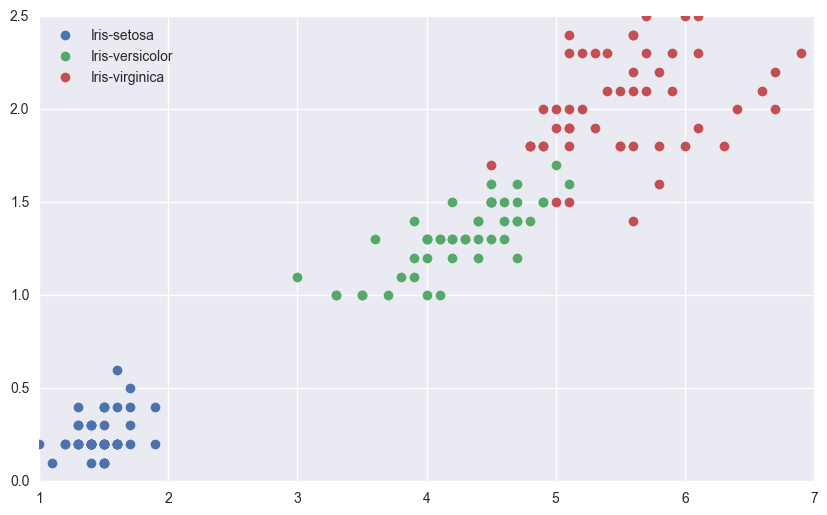

In [19]:
plt.figure(figsize=(10,6))
plt.clf()

def scatter(group):
    print('group = {!r}, {!r}'.format(group.Name.iloc[0], group.shape))
    plt.plot(group.PetalLength, group.PetalWidth, 'o', label=group.name)
    
iris.groupby('Name').apply(scatter)
plt.legend(loc=0);

## With Seaborn

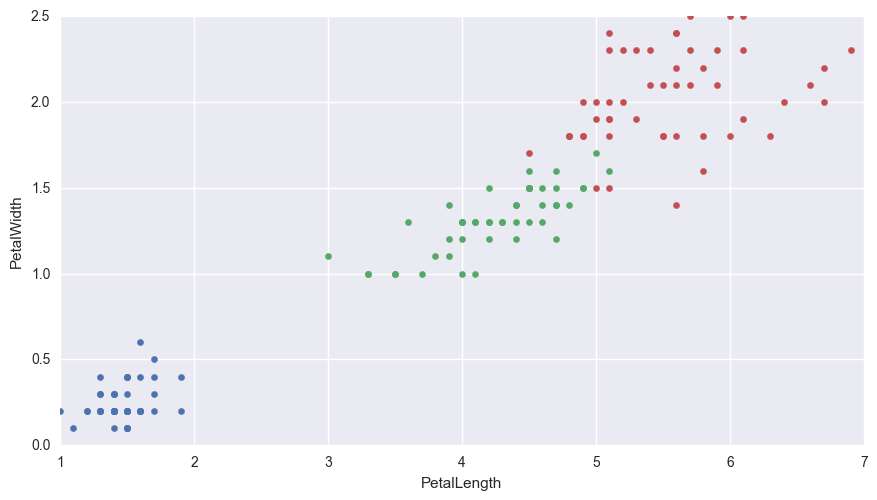

In [20]:
g = sns.FacetGrid(iris, hue='Name', aspect=10/6)
g.map(plt.scatter, 'PetalLength', 'PetalWidth')
plt.xlim([1, 7])
plt.ylim([0, 2.5])
g.fig.set_figheight(6)
g.fig.set_figwidth(10)


## With ggplot

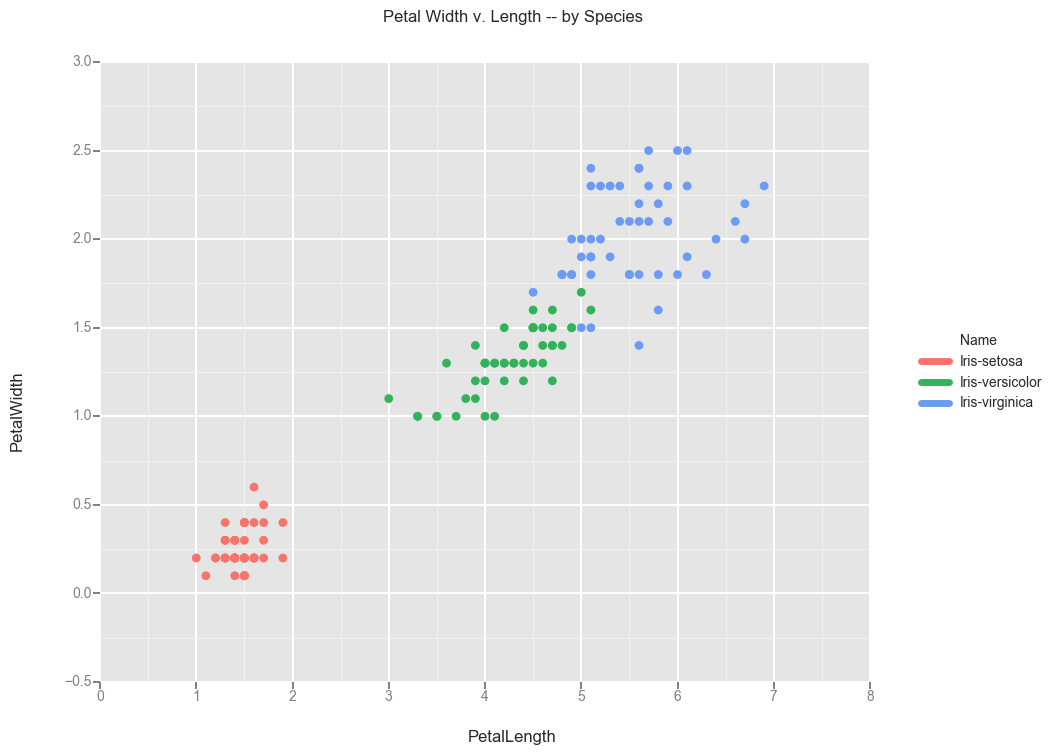

<ggplot: (291802863)>

In [21]:
# GGPLOT
g = ggplot(iris, aes(x='PetalLength',
                   y='PetalWidth',
                   color='Name')) + \
        geom_point(size=40.0) + \
        ggtitle('Petal Width v. Length -- by Species')
g

## With Altair

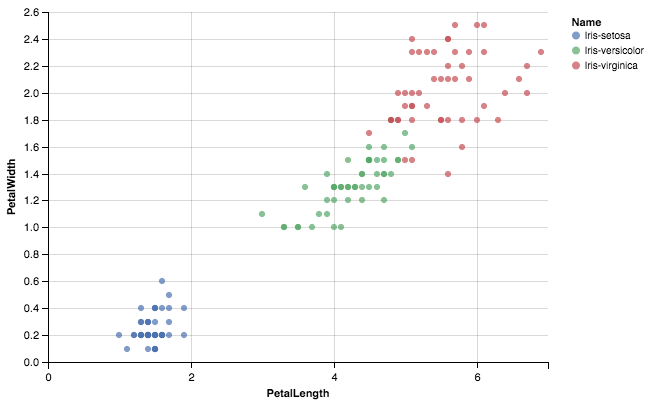

In [26]:
# ALTAIR
plt.figure(figsize=(10,6))
Chart(iris).mark_point(filled=True).encode(
    x='PetalLength',
    y='PetalWidth',
    color=Color('Name', scale=Scale(range=cp.as_hex()))
)


## Faceted scatter plots
Plot the scatter plots on separate figures for each type of iris, but use the same scale for comparison.

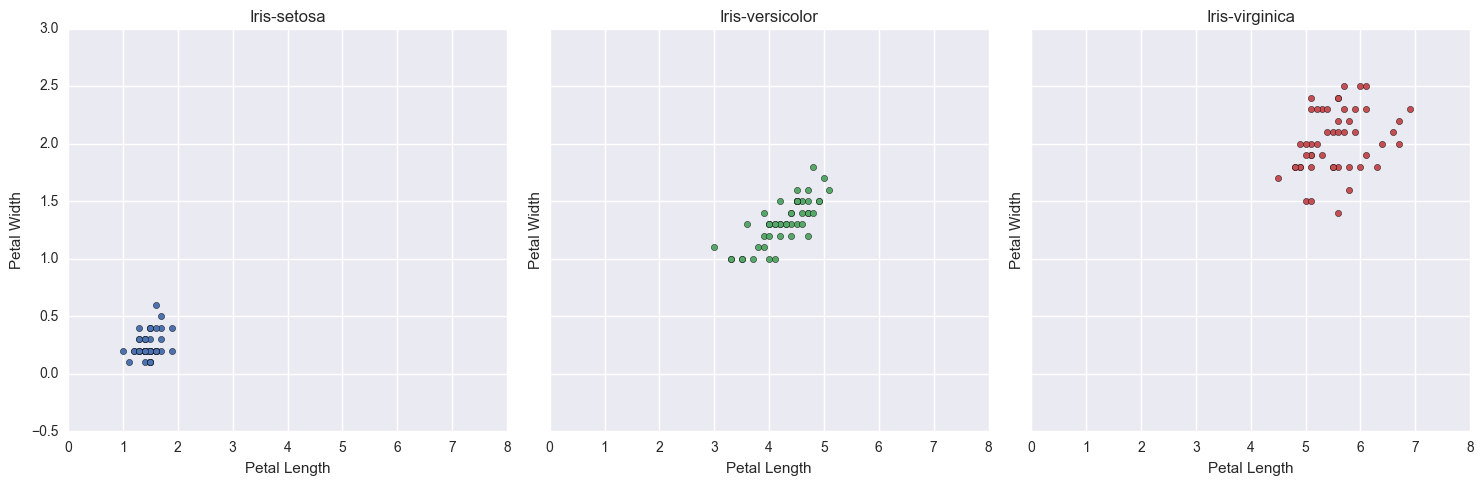

In [30]:
# MATPLOTLIB
fig, ax = plt.subplots(1, 3, figsize=(15, 5),
                       sharex=True, sharey=True)
 
for i, s in enumerate(iris.Name.unique()):
    tmp = iris[iris.Name == s]
 
    ax[i].scatter(tmp.PetalLength,
                  tmp.PetalWidth,
                  c=cp[i])
 
    ax[i].set(xlabel='Petal Length',
              ylabel='Petal Width',
              title=s)
 
fig.tight_layout()

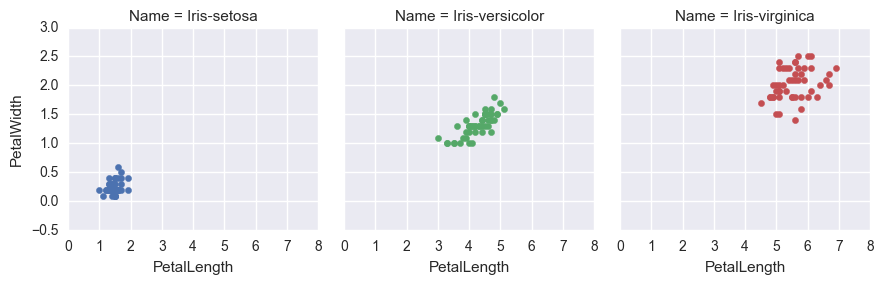

In [39]:
# Seaborn
g = sns.FacetGrid(iris, hue='Name', col='Name')
g.map(plt.scatter, 'PetalLength', 'PetalWidth')

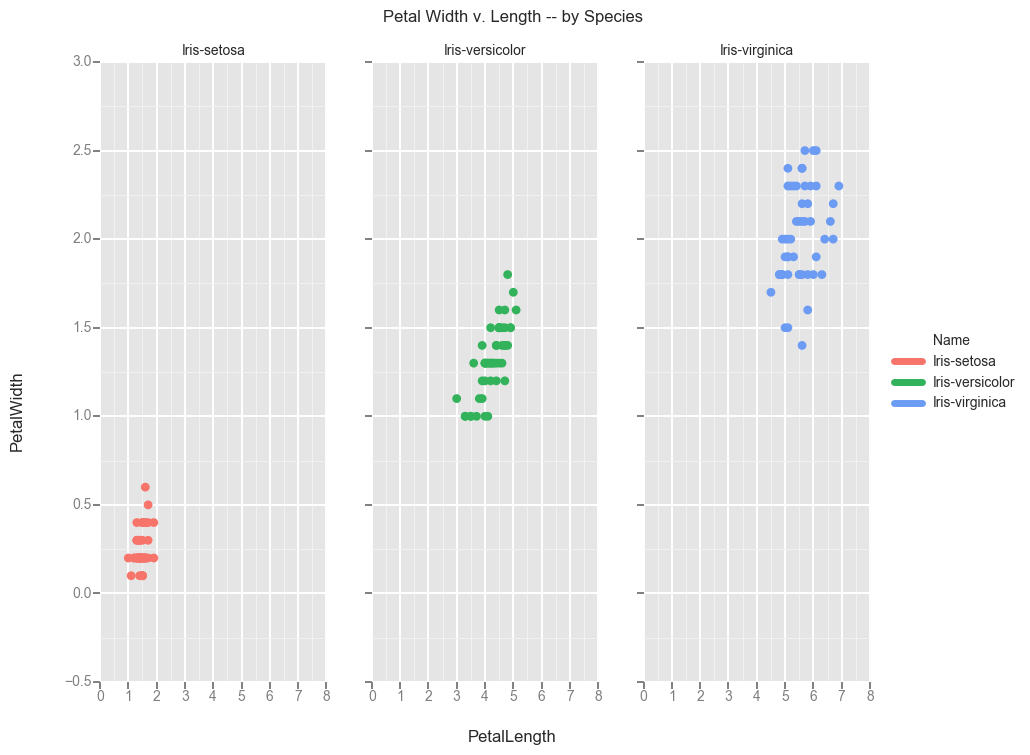

<ggplot: (-9223372036554894248)>

In [40]:
## ggplot
g = ggplot(iris, aes(x='PetalLength',
                   y='PetalWidth',
                   color='Name')) + \
        geom_point(size=40.0) + \
        facet_grid(y='Name') + \
        ggtitle('Petal Width v. Length -- by Species')
g

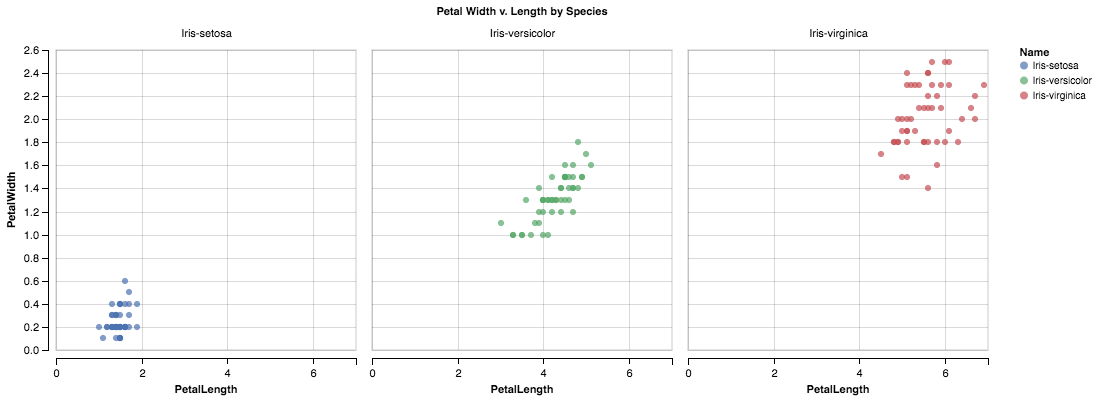

In [50]:
from altair import Column
# Altair
plt.figure(figsize=(10,6))
c = Chart(iris).mark_point(filled=True).encode(
    x='PetalLength',
    y='PetalWidth',
    column=Column('Name', title='Petal Width v. Length by Species'),
    color=Color('Name', scale=Scale(range=cp.as_hex()))
)
c.configure_cell(width=300, height=300)

## Distributions
Box plots and Histograms

### Matplotlib

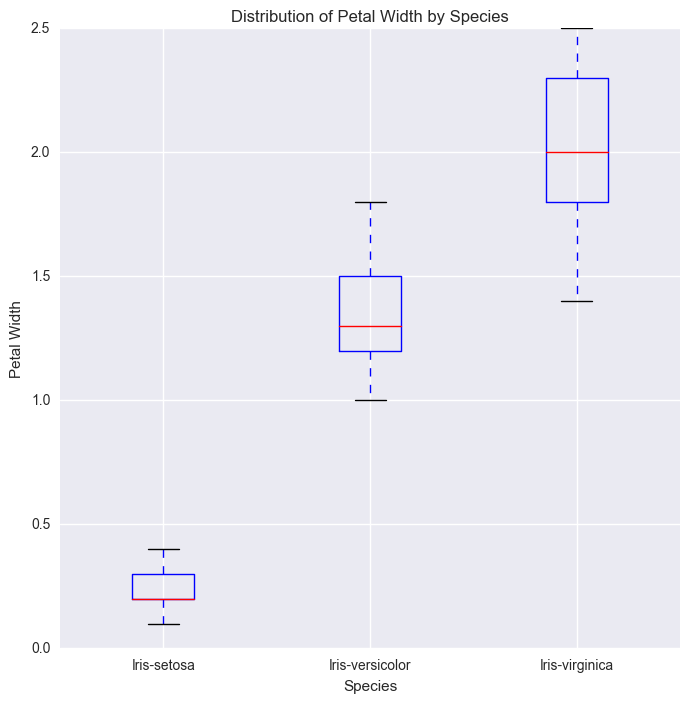

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
 
ax.boxplot([iris[iris.Name == s]['PetalWidth'].values
                for s in iris.Name.unique()])
 
ax.set(xticklabels=iris.Name.unique(),
       xlabel='Species',
       ylabel='Petal Width',
       title='Distribution of Petal Width by Species');

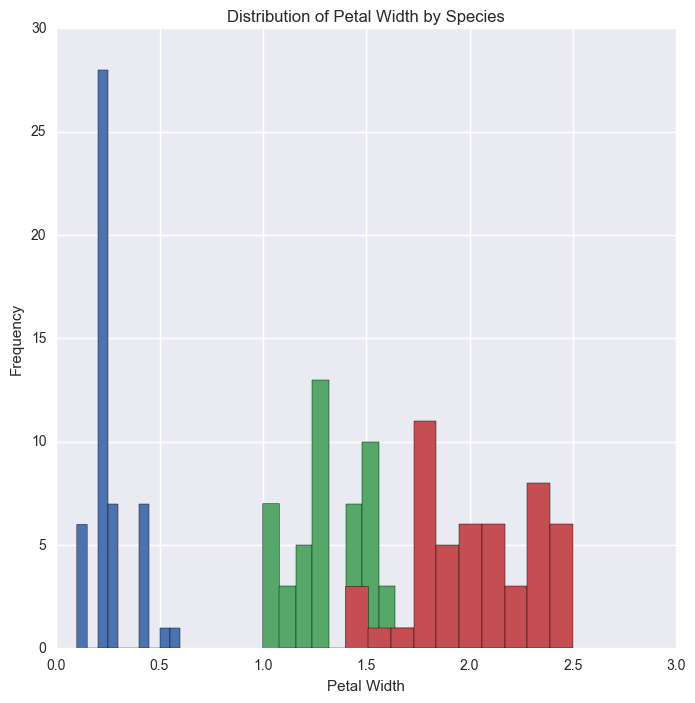

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

for name in iris.Name.unique():
    species = iris[iris.Name == name]
    ax.hist(species['PetalWidth'], label=name)
 
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Distribution of Petal Width by Species')

## With Pandas
Pandas allows to easily plot histograms and boxplots for dataframes, using the `column` and `by` parameters of the `boxplot` and `hist` methods.

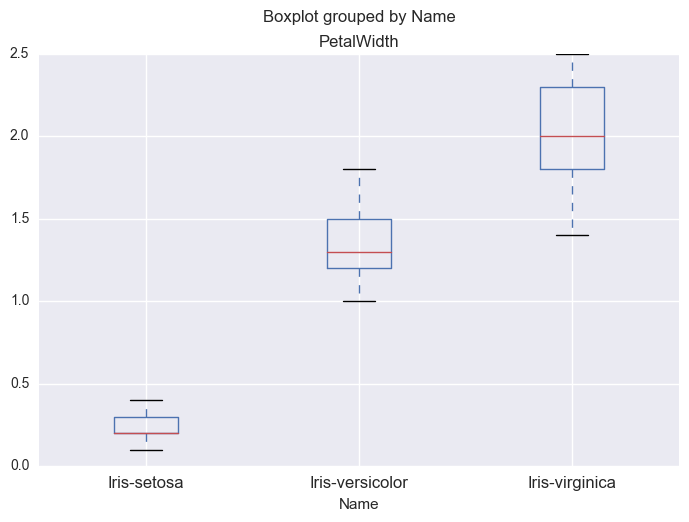

In [73]:
iris.boxplot(column='PetalWidth', by='Name')

The hitograms are plotted on separate subfigures, but we can use a `pivot` with `plot.hist` to get them all on the same figure

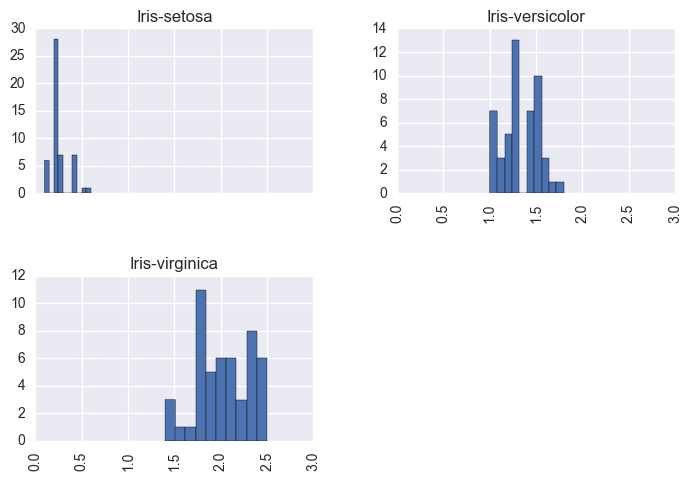

In [107]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
fig.clf()
iris.hist(column='PetalWidth', by='Name', sharex=True);

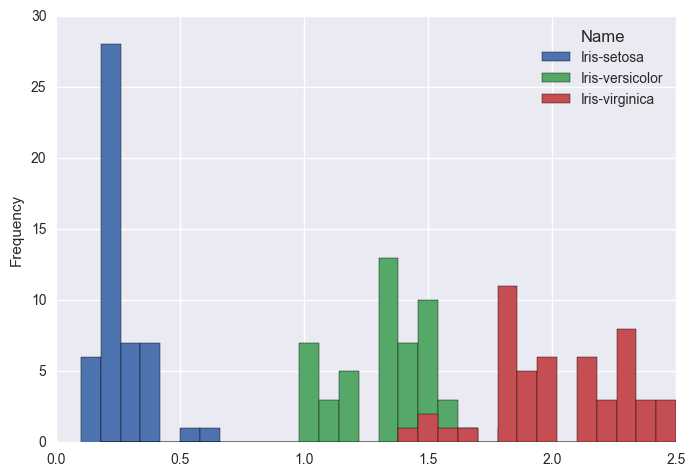

In [108]:
iris.pivot(columns='Name', values='PetalWidth').plot.hist(bins=30)

## Seaborn 

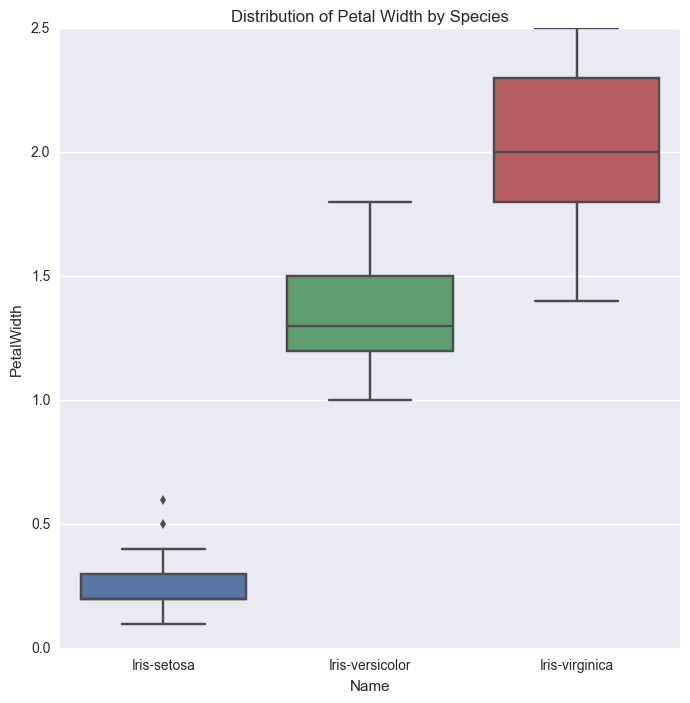

In [116]:
# SEABORN
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
 
g = sns.boxplot('Name', 'PetalWidth', data=iris, ax=ax)
g.set(title='Distribution of Petal Width by Species')

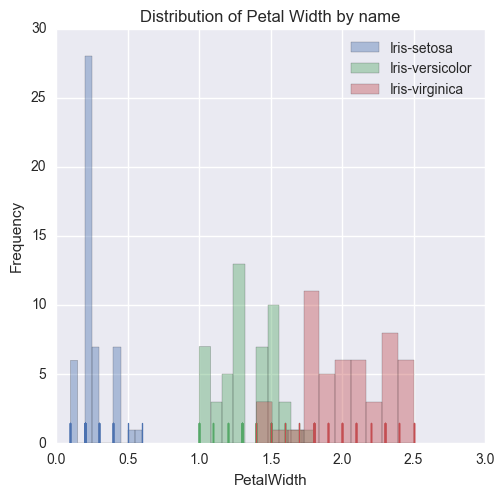

In [142]:
g = sns.FacetGrid(iris, hue='Name', size=5, aspect=1)
g.map(sns.distplot, 'PetalWidth', kde=False, rug=True, bins=10)
plt.title('Distribution of Petal Width by name')
plt.legend()
plt.ylabel('Frequency')

GGPlot

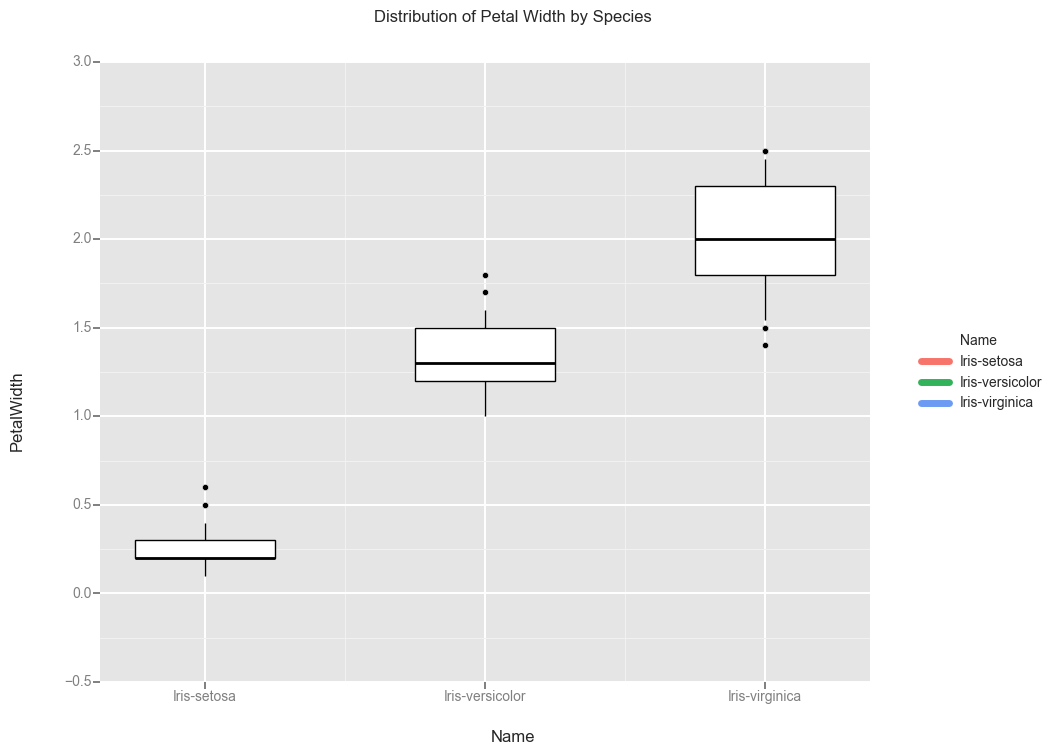

<ggplot: (320212835)>

In [150]:
# GGPLOT (color doesn't quite work)
g = ggplot(iris, aes(x='Name',
                   y='PetalWidth',
                   fill='Name')) + \
        geom_boxplot(color='Name') + \
        ggtitle('Distribution of Petal Width by Species')
g


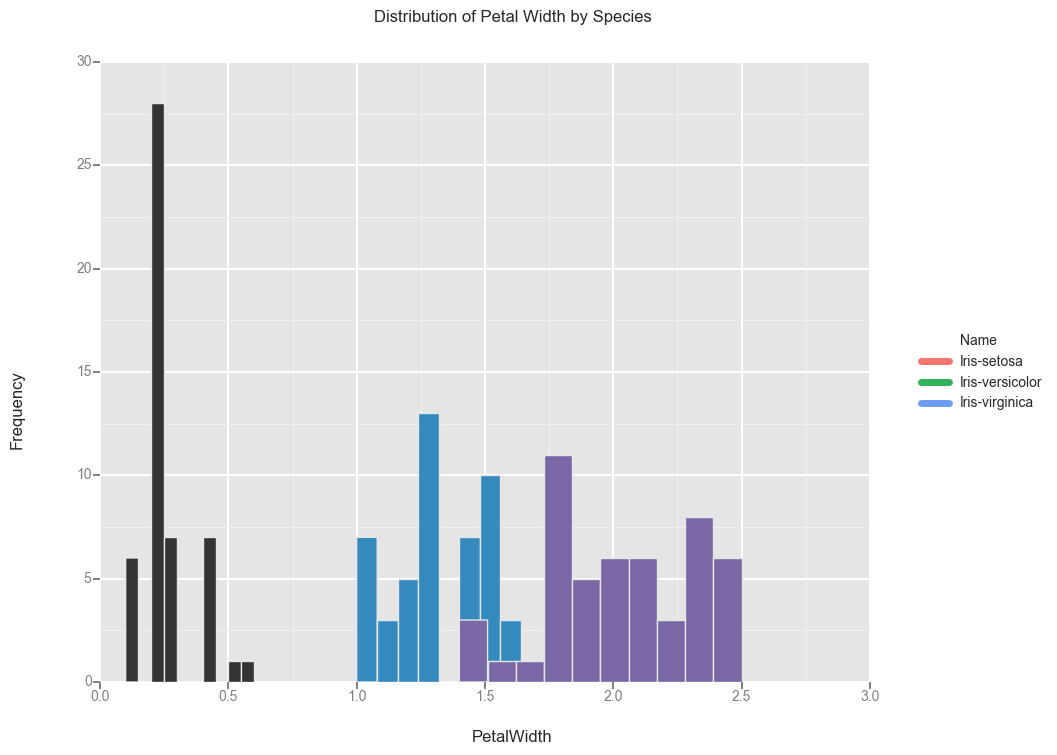

<ggplot: (-9223372036533238861)>

In [154]:
plt.figure(figsize=(6,6))
plt.clf()
g = ggplot(iris, aes(x='PetalWidth',
                   fill='Name')) + \
        geom_histogram() + \
        ylab('Frequency') + \
        ggtitle('Distribution of Petal Width by Species')
g


### ALTAIR

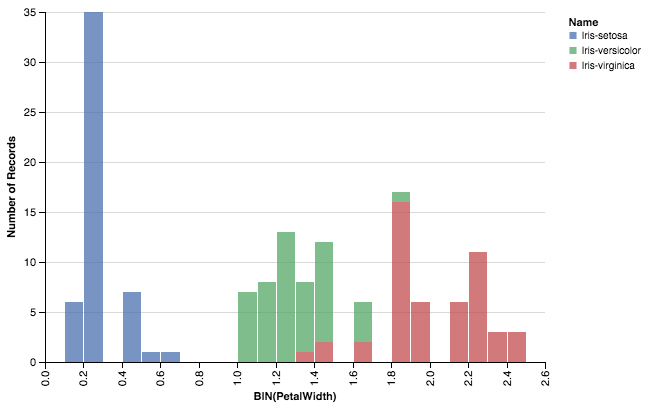

In [162]:

from altair import X, Bin
Chart(iris).mark_bar(opacity=.75).encode(
    x=X('PetalWidth', bin=Bin(maxbins=30)),
    y='count(*)',
    color=Color('Name', scale=Scale(range=cp.as_hex()))
)

# Pair plots
## With Seaborn
Another very powerful plot is to pair all features. 
- `pairplot`: scatter for off-diagonal terms and histogram accross the diagonal
- contour plot off diagonal and distribution accross the diagonal

/Users/sinayoks/anaconda/envs/house/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


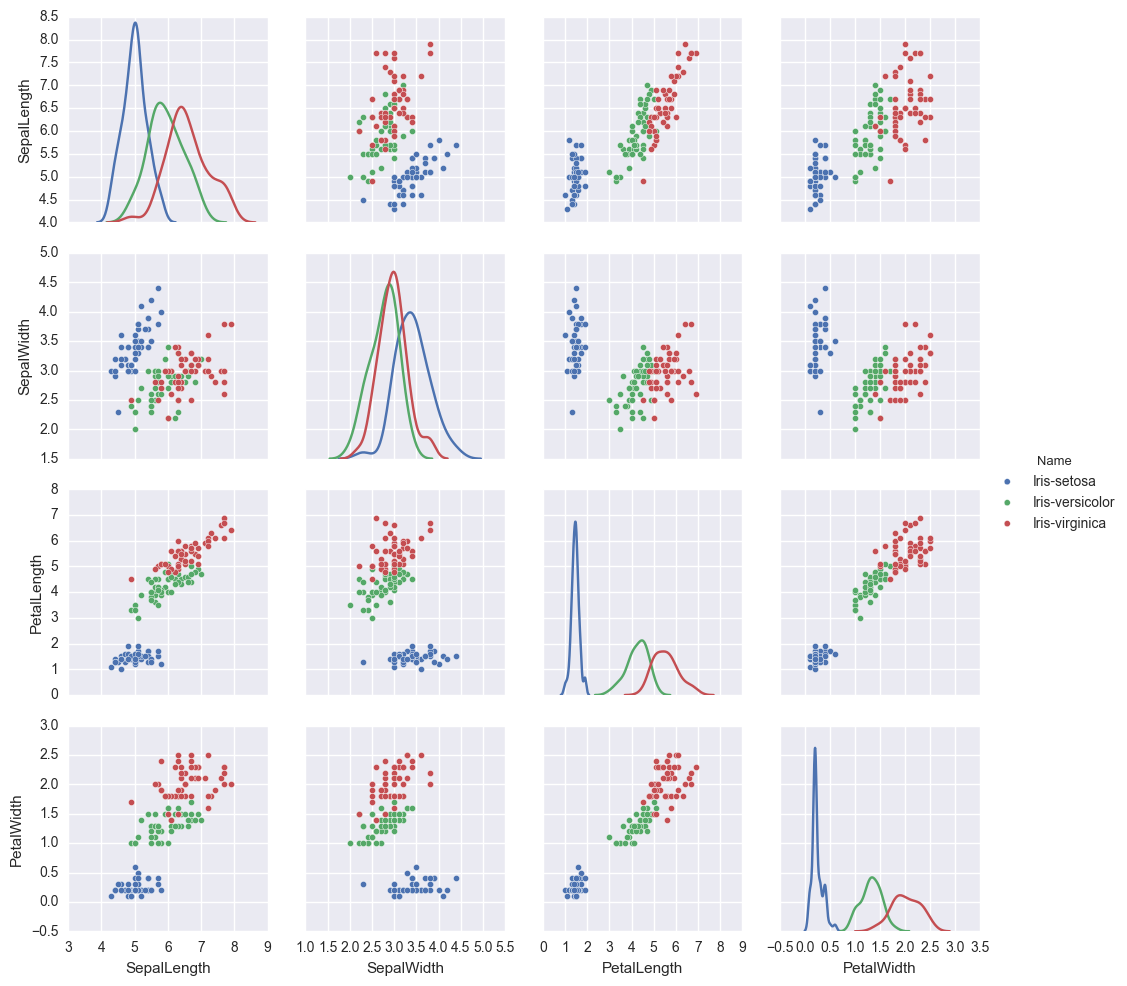

In [208]:
sns.pairplot(iris, 'Name', diag_kind='kde')

/Users/sinayoks/anaconda/envs/house/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/Users/sinayoks/anaconda/envs/house/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


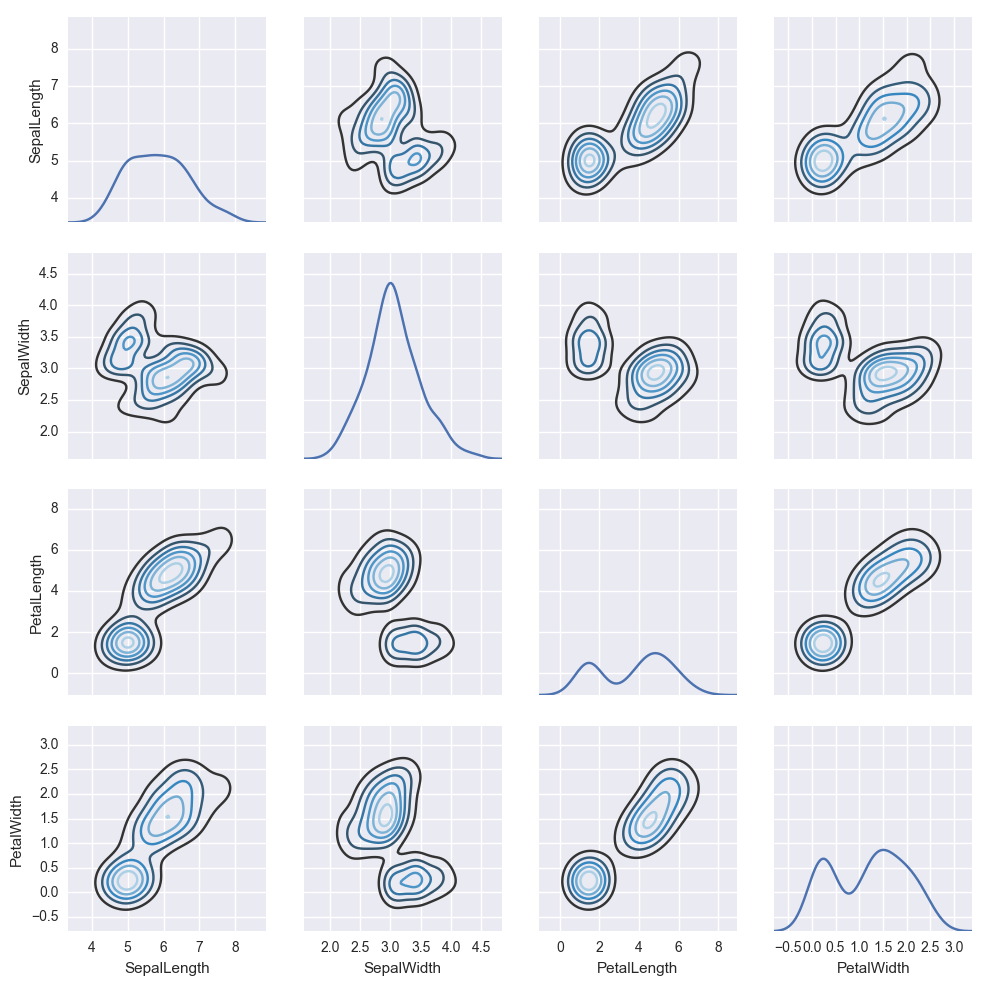

In [166]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

### With Pandas

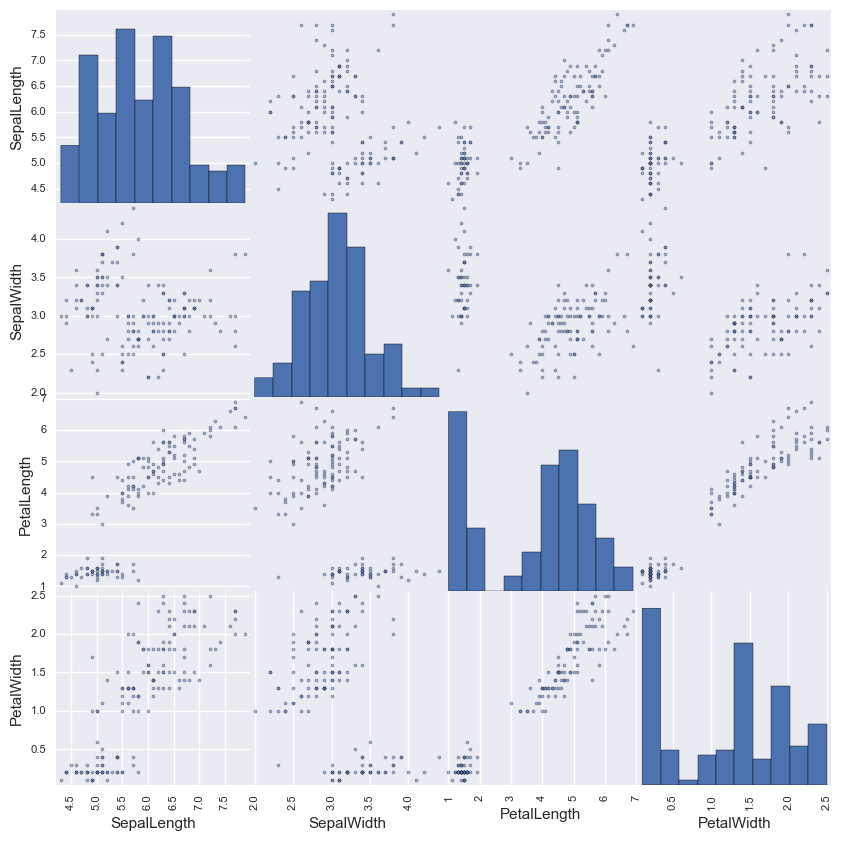

In [172]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris, figsize=(10,10), diagonal='hist');

## Andrews curves
Looking at the Andres curves, it can be seen that the `setosa` is very different from the two others (`versicolor` and `viginica`). Each curve represents all the features of one data point as a sine wave, using the value of each feature for that data point as the coefficients of a Fourier series. Similar categories will exhibit a similar structure.

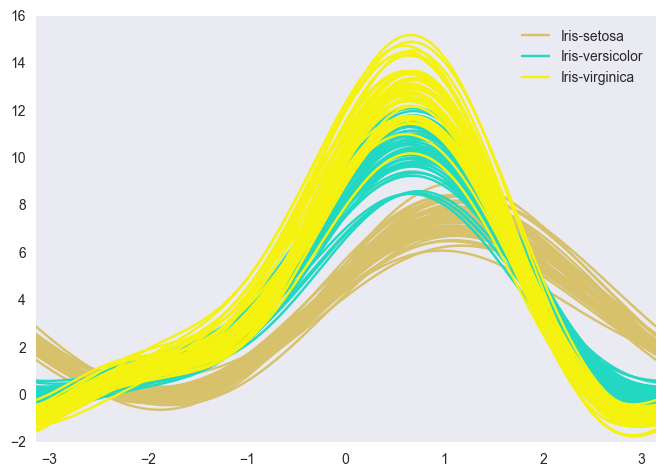

In [190]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris, 'Name')

## Parallel coordinates
However it's unclear which feature sets the `setosa` apart. We can find that out using `parallel_coordinates`. The figure below suggests that it is the `PetalLength` as well as the `PetalWidth` that are clearly different for the `setosa` compared to the other species.

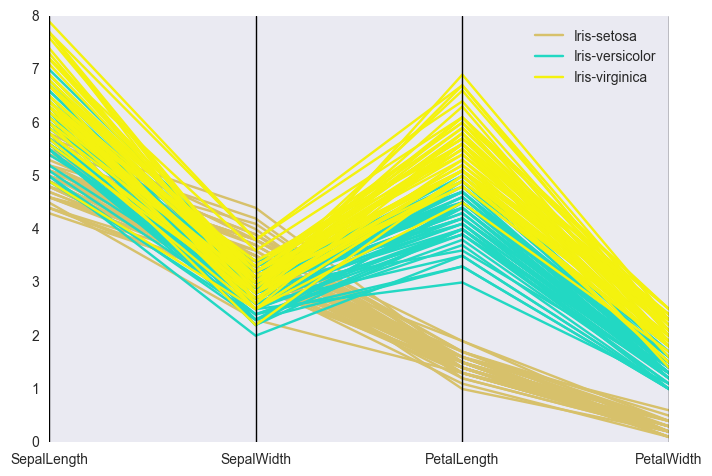

In [192]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris, 'Name')

## RadViz
The RadViz plot below (http://pandas.pydata.org/pandas-docs/stable/visualization.html#radviz) also suggests that the petal width and petal lengths are different for setosa:
- the petal width is much smaller
- the petal length is somewhat smaller 
The RadViz plot also  suggests that it is the `SepalWidth` that most accounts for the difference between `setosa` and the two other irises. 

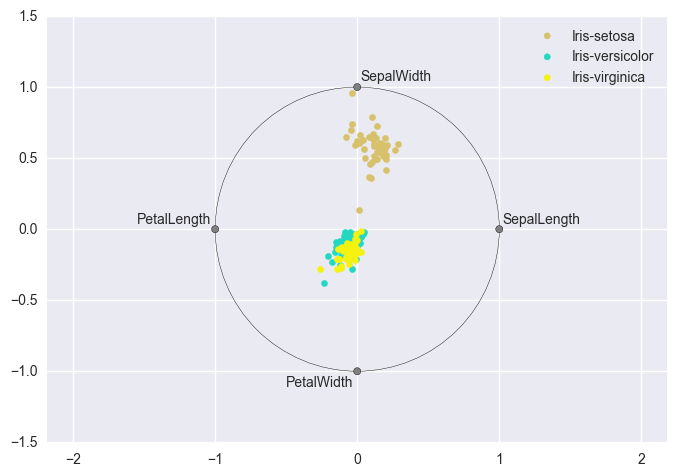

In [194]:
from pandas.tools.plotting import radviz
radviz(iris, 'Name')

It is interesting to compare the `RadViz` plot with the distributions. According to the distributions below, all the lengths are smaller for `setosa` than the other 2 irises, except for the sepal width, which is substantially bigger. This is consistent with the radviz plot, where the `setosa` points are clustered near the `SepalWidth` point.

/Users/sinayoks/anaconda/envs/house/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


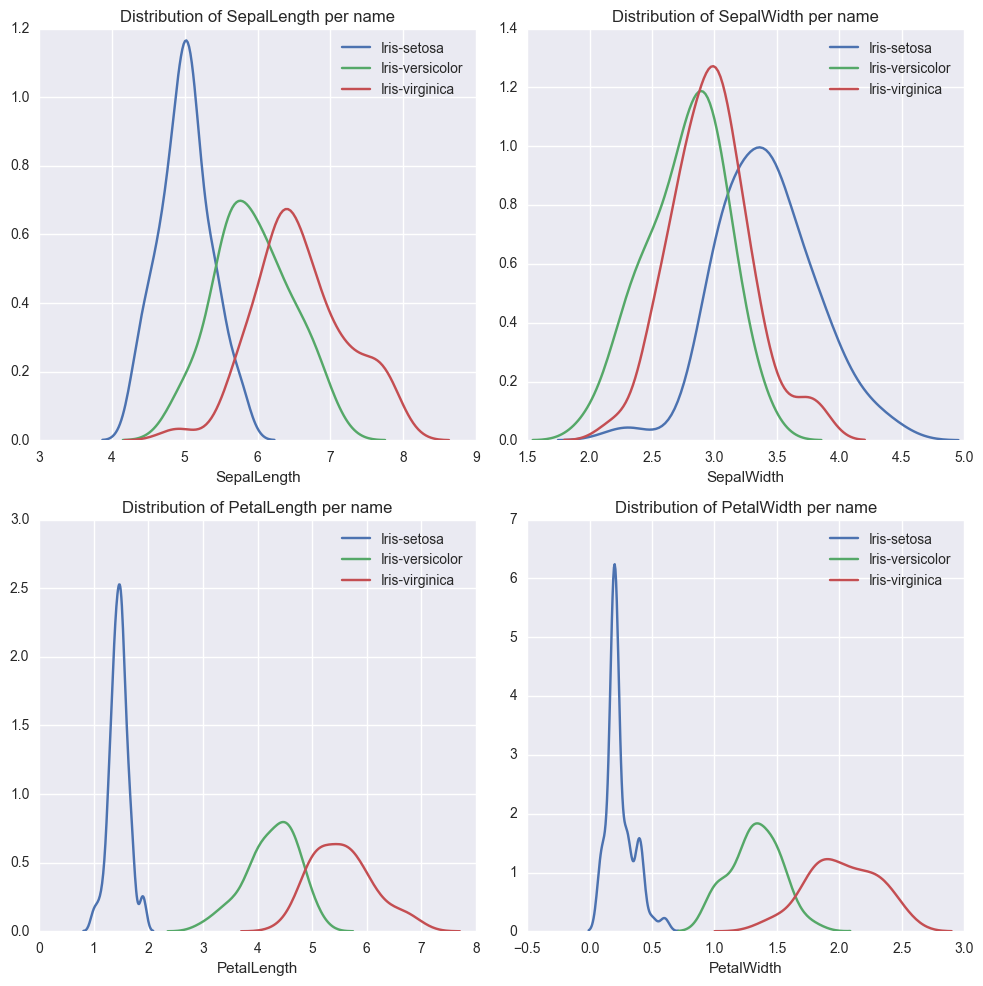

In [274]:
from itertools import chain
fig, axes = plt.subplots(2,2, figsize=(10, 10));
g = sns.FacetGrid(iris, hue='Name')
for ax, feature in zip(chain.from_iterable(axes), [c for c in iris.columns if c != 'Name']):
    g.map(sns.kdeplot, feature, ax=ax)
    ax.set(xlabel=feature,
           title='Distribution of {} per name'.format(feature));
plt.close(g.fig) 
plt.tight_layout()

## Principal Component Analysis
PCA provides another way to interpret the data, and is useful to reduce dimensionality. We can project our 4 dimensional dataset into a 2 dimensional space that captures most of the variance. 

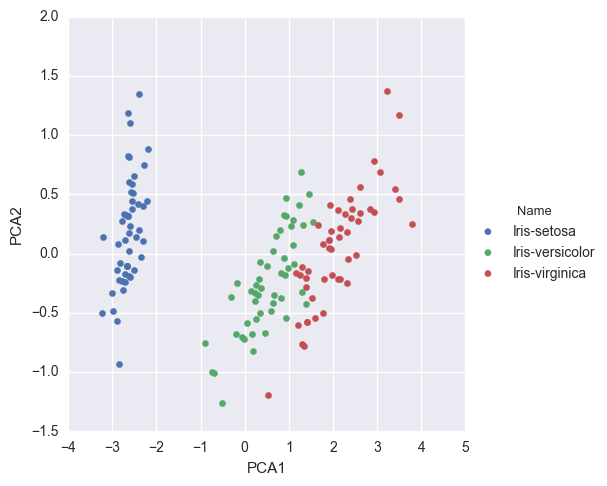

In [384]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = iris.drop('Name', axis=1)
x1, x2 = pca.fit(X).transform(X).T
df12 = pd.DataFrame(data={'PCA1': x1, 'PCA2': x2, 'Name':iris.Name})
sns.FacetGrid(df12, hue='Name', size=5).map(plt.scatter, 'PCA1', 'PCA2').add_legend()

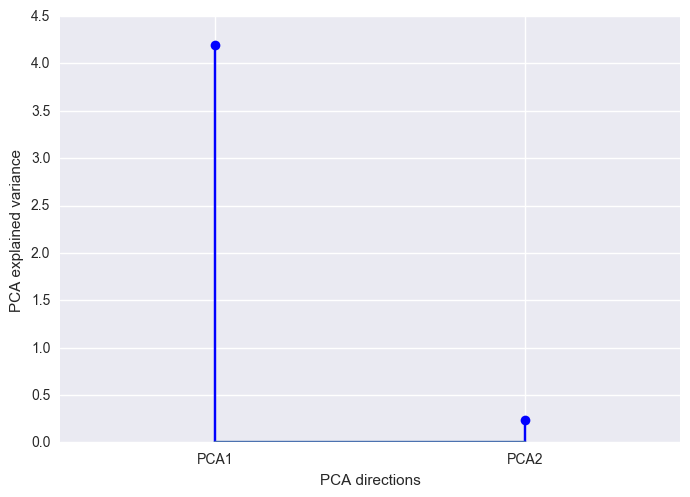

In [400]:
plt.stem(pca.explained_variance_, basefmt='')
plt.xlim([-0.5, 1.5])
plt.gca().set_xticks([0, 1])
plt.gca().set_xticklabels(['PCA1', 'PCA2'])
plt.xlabel('PCA directions')
plt.ylabel('PCA explained variance')

In [401]:
components = pd.DataFrame(data=pca.components_, columns=iris.columns[:4], index=['PCA1', 'PCA2'])
components

,SepalLength,SepalWidth,PetalLength,PetalWidth
PCA1,0.36159,-0.082269,0.856572,0.358844
PCA2,0.65654,0.729712,-0.175767,-0.074706


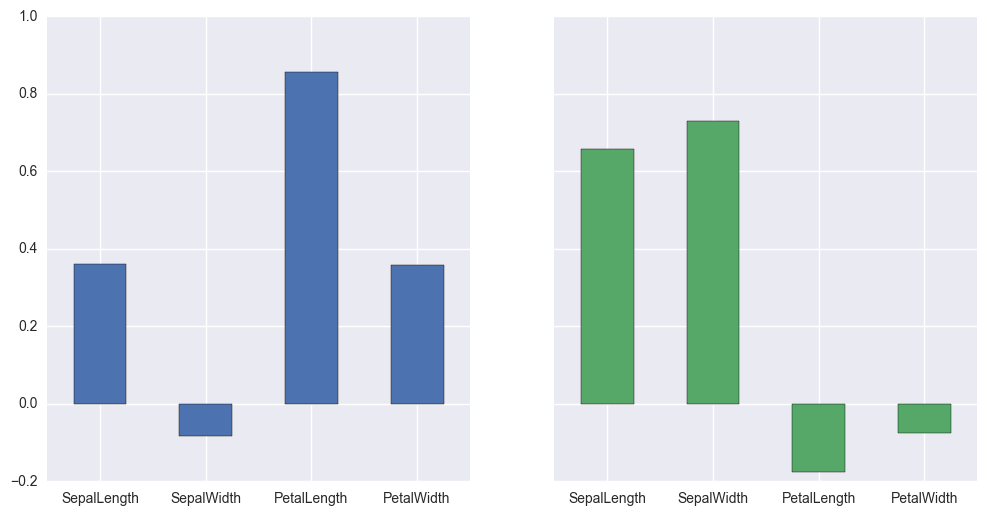

In [410]:
fig, axes = plt.subplots(1,2,figsize=(12, 6), sharey=True)
components.loc['PCA1'].plot(kind='bar', color=cp[0], ax=axes[0])
components.loc['PCA2'].plot(kind='bar', color=cp[1], ax=axes[1])
axes[0].set_xticklabels(components.columns, rotation=0);
axes[1].set_xticklabels(components.columns, rotation=0);

The figure above confirms that the sepal width is what separates the setosa from the two others. The sepal width is negative in `PCA1` while the petal length and width are positive. The PCA analysis indicates that setosa is very negative along the `PCA1` axis, due to its large sepal width compared to the two other flowers. 

### PCA Gotcha
The alternative approach below applies PCA to each type of iris. This doesn't work because the data is normalised, so all the scatter plots end up looking the same. When using PCA, use the whole (training) dataset to compute the principal components and fit the data. 

""


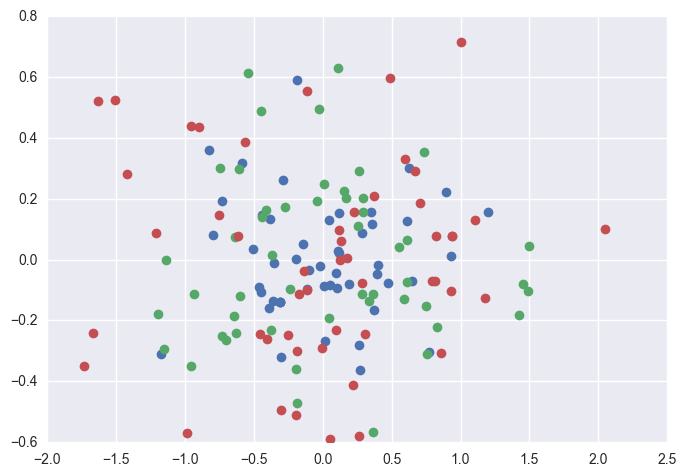

In [330]:
from sklearn.decomposition import PCA

def pca_scatter(group):
    data = group.drop('Name', axis=1).values
    #print('name = {}, data = {}', group.name, data.iloc[:10])
    pca = PCA(n_components=2)
    pca.fit(data)
    species = pca.transform(data).T
    plt.plot(species[0], species[1], 'o', label=group.name)

iris.groupby('Name').apply(pca_scatter)